# **Logistic Regression**
주제 : 로지스틱 회귀를 이용한 사업체 유형과 일가정 양립의 상관관계 분석 <br>
사용 데이터 : 2021년 일가정 양립 실태조사 데이터
<br><br>
사용 변수
- 사업체 유형(업종, 규모, 지역, 소재지, 노조유무 등)
- 육아 등 돌봄지원제도 활용가능여부(출산전후휴가, 배우자출산휴가, 임신기근로기간단축제도, 육아휴직제도, 가족돌봄휴가제도)



# 1. 데이터 불러오기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/dataset.csv', encoding='cp949', index_col=0)
print(df)

       리스트아이디  info1  info2  info3  a4  b1a12  b4a12  b5a12  b7a12  c1a12  \
아이디                                                                         
61232  100003      8      1     16   1    3.0    3.0    2.0    NaN    3.0   
62016  100004     15      2      3   1    1.0    NaN    NaN    NaN    NaN   
30281  100005      3      5     10   2    1.0    1.0    2.0    1.0    1.0   
30582  100006     10      1      1   2    NaN    NaN    NaN    NaN    1.0   
61299  100009      2      1      1   1    1.0    1.0    1.0    1.0    1.0   
...       ...    ...    ...    ...  ..    ...    ...    ...    ...    ...   
31587  504167     12      4     10   2    2.0    1.0    1.0    1.0    1.0   
31794  504271     12      5      6   2    1.0    1.0    1.0    1.0    1.0   
31791  504290     12      5      1   2    1.0    1.0    1.0    1.0    1.0   
31698  504432     12      5      6   2    1.0    1.0    1.0    1.0    1.0   
31493  504441      6      5      4   1    1.0    1.0    1.0    1.0    1.0   

1: 제도 활용 가능 <BR>
0: 제도 활용 불가능

In [ ]:
# 값이 2 또는 3인 경우를 0으로 바꾸기
columns_to_replace = ['b1a12', 'b4a12', 'b5a12', 'b7a12',
                       'c1a12', 'c17a12', 'c20a12', 'c22a12']

df[columns_to_replace] = df[columns_to_replace].replace({2: 0, 3: 0})

# NULL 값 확인하고 0으로 바꾸기
df[columns_to_replace] = df[columns_to_replace].fillna(0)

# 결과 확인
print(df.head())

       리스트아이디  info1  info2  info3  a4  b1a12  b4a12  b5a12  b7a12  c1a12  \
아이디                                                                         
61232  100003      8      1     16   1    0.0    0.0    0.0    0.0    0.0   
62016  100004     15      2      3   1    1.0    0.0    0.0    0.0    0.0   
30281  100005      3      5     10   2    1.0    1.0    0.0    1.0    1.0   
30582  100006     10      1      1   2    0.0    0.0    0.0    0.0    1.0   
61299  100009      2      1      1   1    1.0    1.0    1.0    1.0    1.0   

       c17a12  c20a12  c22a12  
아이디                            
61232     0.0     0.0     0.0  
62016     0.0     0.0     0.0  
30281     1.0     1.0     0.0  
30582     0.0     0.0     0.0  
61299     1.0     1.0     0.0  


# 2. Select Feature

In [ ]:
#cols = ['info1', 'info2', 'info3', 'a4', 'b4a12']
cols = ['info2', 'a4', 'c1a12']

# 3. Train Model with PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([5070, 3])

In [ ]:
# Split x and y.
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([5070, 2]) torch.Size([5070, 1])


In [ ]:
# Define configurations.
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [ ]:
# Define custom model.
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()

    def forward(self, x):
        # |x| = (batch_size, input_dim)
        y = self.act(self.linear(x))
        # |y| = (batch_size, output_dim)

        return y

In [ ]:
model = MyModel(input_dim=x.size(-1),
                output_dim=y.size(-1))
crit = nn.BCELoss()  # Define BCELoss instead of MSELoss.


# Choose the optimizer (AdaGrad, RMSProp, or ADAM)
#optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)
#optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
#optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 10000: loss=5.8531e-01
Epoch 20000: loss=5.8531e-01
Epoch 30000: loss=5.8531e-01
Epoch 40000: loss=5.8531e-01
Epoch 50000: loss=5.8531e-01
Epoch 60000: loss=5.8531e-01
Epoch 70000: loss=5.8531e-01
Epoch 80000: loss=5.8531e-01
Epoch 90000: loss=5.8531e-01
Epoch 100000: loss=5.8531e-01
Epoch 110000: loss=5.8531e-01
Epoch 120000: loss=5.8531e-01
Epoch 130000: loss=5.8531e-01
Epoch 140000: loss=5.8531e-01
Epoch 150000: loss=5.8531e-01
Epoch 160000: loss=5.8531e-01
Epoch 170000: loss=5.8531e-01
Epoch 180000: loss=5.8531e-01
Epoch 190000: loss=5.8531e-01
Epoch 200000: loss=5.8531e-01


# 4. 결과 확인

In [ ]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f' % (correct_cnt / total_cnt))


Accuracy: 0.6789


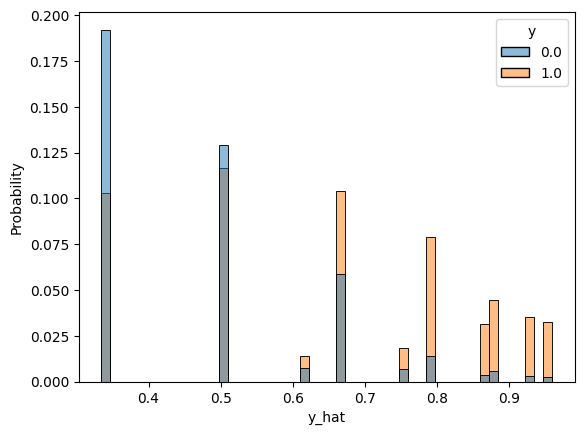

In [ ]:
df_result = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                          columns=["y", "y_hat"])

sns.histplot(df_result, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()